In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_excel("happiness.xlsx")

In [5]:
df

,맑음지수,미세먼지정도,Youtube시청시간(h),쉬는날?,작업진행잘됨?,맛있는식사,행복지수
너굴맨이 처리함,99,50,4,1,50,80,88
OHmygodkimchi,80,80,2,0,50,100,63
OHmybackkimchi,90,50,1,1,70,30,70
OHmygodanan-a-ki,30,80,5,0,85,44,80
Park,30,30,1,0,95,100,90
Yoo,0,100,0,0,0,0,0
Jin,60,20,1,1,90,100,100
HyunGoo\n,90,20,2,0,20,80,15
Dave,35,10,1,1,80,55,92
창민아생일축하한다!!,10,10,2,1,60,20,100


In [27]:
np.set_printoptions(3, suppress=True)

In [28]:
df.columns

Index(['맑음지수', '미세먼지정도', 'Youtube시청시간(h)', '쉬는날? ', '작업진행잘됨?', '맛있는식사',
       '행복지수'],
      dtype='object')

In [6]:
# 누락 갯수
df.isnull().sum().sum()

0

In [7]:
#유효성 검사
(df < 0).sum().sum()

0

### 상관계수

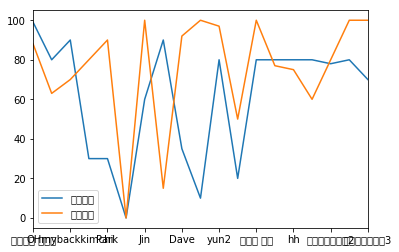

In [12]:
df[['맑음지수', '행복지수']].plot()

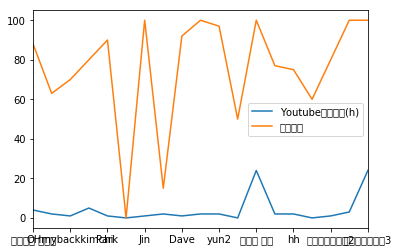

In [14]:
df[['Youtube시청시간(h)', '행복지수']].plot()

corr()이 제일 확실하다.

In [29]:
df.corr() # 상관계수 1, 0:상관없음, -1:음의상관

,맑음지수,미세먼지정도,Youtube시청시간(h),쉬는날?,작업진행잘됨?,맛있는식사,행복지수
맑음지수,1.000000,-0.016246,0.196877,0.054029,0.074477,0.503027,0.195411
미세먼지정도,-0.016246,1.000000,0.011971,-0.298306,-0.299184,-0.101656,-0.328178
Youtube시청시간(h),0.196877,0.011971,1.000000,-0.356586,-0.248312,-0.043289,0.359052
쉬는날?,0.054029,-0.298306,-0.356586,1.000000,0.318821,0.040042,0.364067
작업진행잘됨?,0.074477,-0.299184,-0.248312,0.318821,1.000000,0.458281,0.660947
맛있는식사,0.503027,-0.101656,-0.043289,0.040042,0.458281,1.000000,0.344156
행복지수,0.195411,-0.328178,0.359052,0.364067,0.660947,0.344156,1.000000


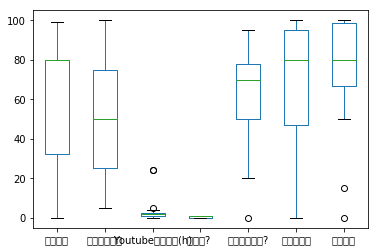

In [30]:
df.plot.box()

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
x = df.drop('행복지수', axis=1)
y = df['행복지수']

In [33]:
x = np.array(x)
y = np.array(y)

In [34]:
model = LinearRegression().fit(x,y)

In [35]:
model.score(x,y)

0.84775437464331627

In [36]:
model.coef_, model.intercept_

(array([ -0.042,  -0.013,   2.692,  21.426,   0.786,   0.063]),
 4.0207491569018572)

맑음지수가 1 높아지면 행복지수 0.04감소  
미세먼지가 1 높아지면 행복지수 0.01감소  
youtube의 시청시간이 증가할수록 시간당 행복지수 2증가  
쉬는날이면 +21 아니면 0  
작업 만족도가 1증가하면 행복지수 0.7증가  
식사의 만족도가 1증가하면 행복지수 0.06 증가  

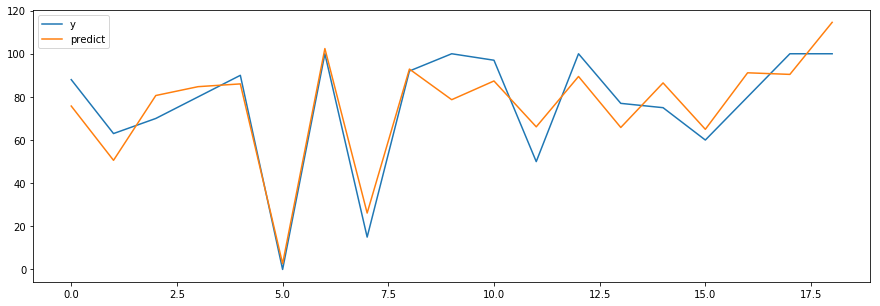

In [26]:
plt.figure(figsize=(15,5))
plt.plot(y, label="y")
plt.plot(model.predict(x), label="predict")
plt.legend()